# Detecção Utilizando tabuleiro de xadres

In [36]:
# Import de bibliotecas
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt


In [37]:
# Define a dimensão do Tabuleiro
CHECKERBOARD = (5,5)

In [38]:
# Prepare object points (0,0,0), (1,0,0), (2,0,0), ..., (5,8,0)
objp = np.zeros((CHECKERBOARD[0]*CHECKERBOARD[1],3), np.float32)
objp[:,:2] = np.mgrid[0:CHECKERBOARD[0],0:CHECKERBOARD[1]].T.reshape(-1,2)

# Arrays to store object points and image points from all the images
objpoints = []
imgpoints = []

In [39]:
# Load calibration images
images = glob.glob('./xadrez/*.jpg')

# Utilizando os metodos do open CV conseguimos fazer a detecção do tabuleiro de xadrez

False
True


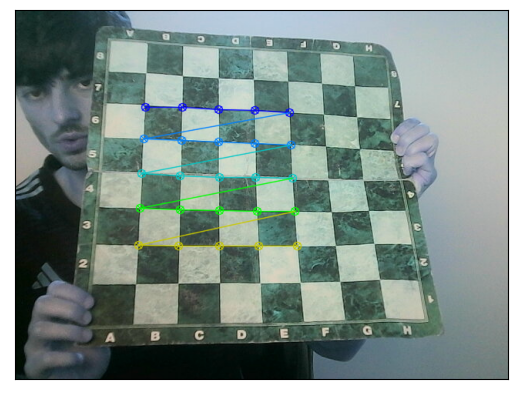

True


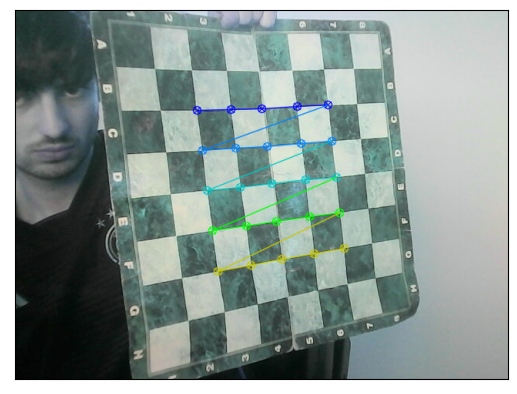

False
True


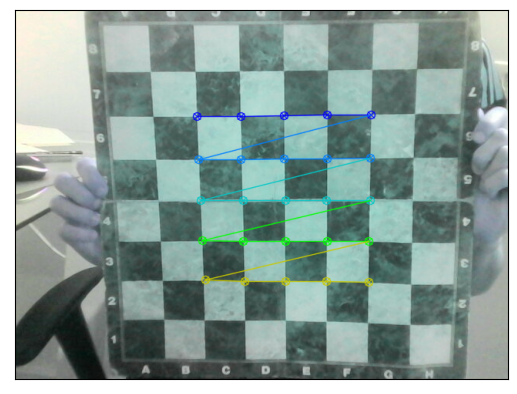

True


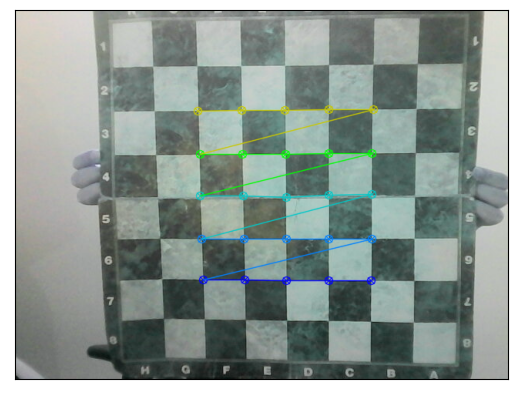

True


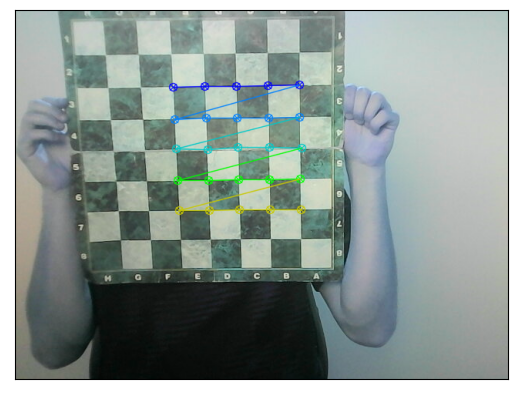

False
True


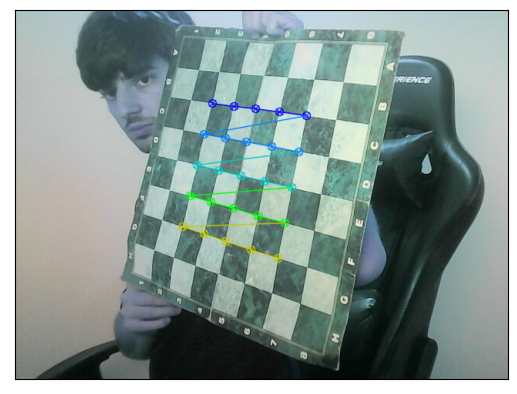

True


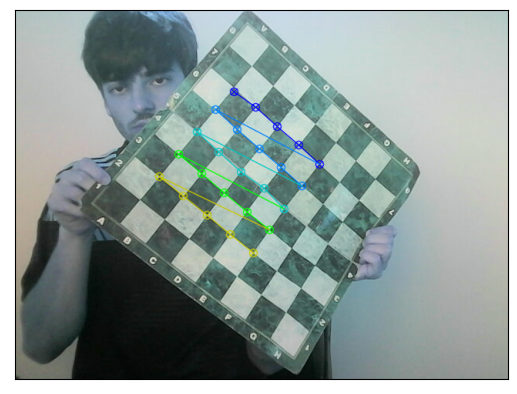

In [40]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, None)
    print(ret)

    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners, ret)
        plt.imshow(img)
        plt.xticks([]), plt.yticks([])  
        plt.show()
    
cv2.destroyAllWindows()

## Calibrando a WEBCAM

In [41]:
# Perform camera calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [42]:
# Save calibration parameters
np.savez('calibration_parameters.npz', mtx=mtx, dist=dist)

In [43]:
# Print the calibration parameters
print('Camera matrix:\n', mtx)
print('\nDistortion coefficients:\n', dist)

Camera matrix:
 [[935.92760917   0.         372.37159491]
 [  0.         936.68133978 210.3136563 ]
 [  0.           0.           1.        ]]

Distortion coefficients:
 [[-1.06372264e+00  3.36644319e+01 -1.21986107e-02  2.48885554e-02
  -2.80355216e+02]]
